In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sn
import tensorflow as tf
import cv

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'C:/Users/Prajval P/LTPL-PRJ-045/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [14]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   #rotation_range = 40,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   #shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
training_dir = 'C:/Users/Prajval P/LTPL-PRJ-045/training_dir/'
validation_dir = 'C:/Users/Prajval P/LTPL-PRJ-045/validation_dir/'
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size = 50,
                                                    class_mode = 'sparse', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 8,
                                                          class_mode  = 'sparse', 
                                                          target_size = (150, 150))

Found 518 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [21]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 40,
            validation_steps = 50,
            verbose = 2)

Epoch 1/40
100/100 - 151s - loss: 0.0073 - accuracy: 0.9983 - val_loss: 1.2326 - val_accuracy: 0.9209
Epoch 2/40
100/100 - 143s - loss: 0.0013 - accuracy: 0.9994 - val_loss: 1.6837 - val_accuracy: 0.9223
Epoch 3/40
100/100 - 146s - loss: 8.3696e-05 - accuracy: 1.0000 - val_loss: 1.5999 - val_accuracy: 0.8803
Epoch 4/40
100/100 - 146s - loss: 1.9388e-06 - accuracy: 1.0000 - val_loss: 1.6319 - val_accuracy: 0.8829
Epoch 5/40
100/100 - 144s - loss: 8.6749e-07 - accuracy: 1.0000 - val_loss: 1.7392 - val_accuracy: 0.9209
Epoch 6/40
100/100 - 145s - loss: 2.6391e-07 - accuracy: 1.0000 - val_loss: 1.6041 - val_accuracy: 0.9612
Epoch 7/40
100/100 - 145s - loss: 1.5237e-07 - accuracy: 1.0000 - val_loss: 1.8252 - val_accuracy: 0.9191
Epoch 8/40
100/100 - 145s - loss: 7.7238e-08 - accuracy: 1.0000 - val_loss: 1.6095 - val_accuracy: 0.9620
Epoch 9/40
100/100 - 148s - loss: 2.1754e-07 - accuracy: 1.0000 - val_loss: 2.1066 - val_accuracy: 0.8797
Epoch 10/40
100/100 - 155s - loss: 8.9671e-07 - accura

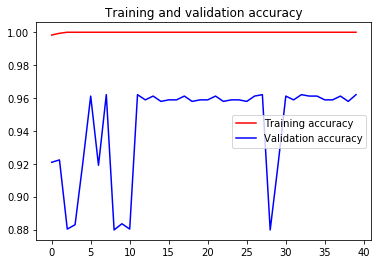

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

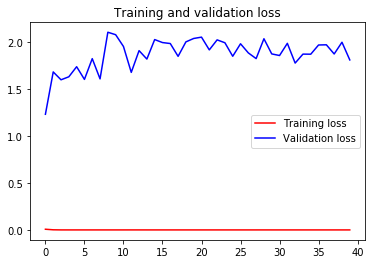

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()